# KDD Cup 99 Dataset

**Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections. Hence KDD Cup 99 dataset was created as a part of annual data mining competition in the year 1999.  

**A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol. Each connection is labeled as either normal, or as an attack, with exactly one specific attack type. Each connection record consists of about 100 bytes.

**Attacks fall into four main categories:
-DOS: denial-of-service, e.g. syn flood;
-R2L: unauthorized access from a remote machine, e.g. guessing password;
-U2R: unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks;
-probing: surveillance and other probing, e.g., port scanning.

**GOAL: Predict if an attack is normal or anamoly

In [1]:
#Reading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.pyplot as plt 
%pylab inline 
data =pd.read_csv("D:/DMKDD/KDDCup99.csv")
data.head()
data.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,494010,494011,494012,494013,494014,494015,494016,494017,494018,494019
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#Analyzing the data
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**If the missing values are not handled properly , then we may end up drawing an inaccurate inference about the data.  Due to improper handling, the result obtained will differ from ones where the missing values are present. The missing values may cause the models to have less accuracy, therefore it is important to handle missing data.

In [3]:
#Finding missing data
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate   

In [4]:
#Number of Rows
print("Including all kinds of attacks, total number of connections are ",len(data))

Including all kinds of attacks, total number of connections are  494020


In [5]:
#Different types of attacks in the database
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
#creating a CSV file with attribute names 
with open('D:/DMKDD/KDDCup99-preprocessed.csv', 'w',newline='') as out:
    writer=csv.writer(out)
    writer.writerow(['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
                     'hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations',
                     'lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
                     'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label'])


In [7]:
#Extracting DoS Attacks from dataset
a=['back','land','neptune','pod','smurf','teardrop','normal']
b=['back','land','neptune','pod','smurf','teardrop']
with open('D:/DMKDD/KDDCup99.csv', 'r') as inp, open('D:/DMKDD/KDDCup99-preprocessed.csv', 'a',newline='') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[41] in a:
            writer.writerow(row)

In [8]:
#Creating new dataframe with modified dataset
%pylab inline 
datapre=pd.read_csv("D:/DMKDD/KDDCup99-preprocessed.csv")
datapre.head()
datapre.transpose()

Populating the interactive namespace from numpy and matplotlib


,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,...,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,http,http,http,http,http,http,http,http,http,http,...,http,http,http,http,http,http,http,http,http,http
flag,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF,...,SF,SF,SF,SF,SF,SF,SF,SF,SF,SF
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Number of Rows
print("Including only DOS attacks, total number of connections are ",len(datapre))

Including only DOS attacks, total number of connections are  488735


In [10]:
#Different types of DOS attacks in the database
datapre['label'].value_counts()

smurf       280790
neptune     107201
normal       97277
back          2203
teardrop       979
pod            264
land            21
Name: label, dtype: int64

In [11]:
#Different types of protocols in the database
datapre['protocol_type'].value_counts()

icmp    282342
tcp     186237
udp      20156
Name: protocol_type, dtype: int64

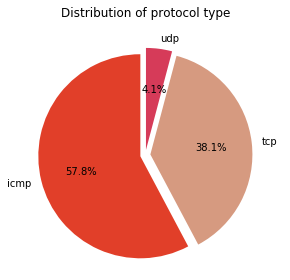

In [12]:
#Drawing a pie chart to classify protocols of connections
colors = ["#E13F29", "#D69A80", "#D63B59"]
labels = ['icmp', 'tcp', 'udp']
sizes = [282342,186237,20156]
explode = (0.05, 0.05, 0.05)  

plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%',colors=colors,shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of protocol type\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

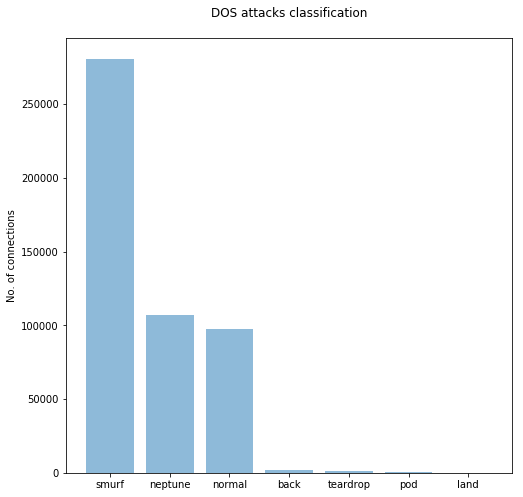

In [13]:
#Drawing a bar graph to classify DOS attacks in connections
objects = ('smurf', 'neptune', 'normal', 'back', 'teardrop', 'pod', 'land')
y_pos = np.arange(len(objects))
performance = [280790,107201,97277,2203,979,264,21]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No. of connections')
plt.title('DOS attacks classification\n')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [14]:
#Mapping of Categorical data in the dataset
cleanup_nums = {"protocol_type":     {"tcp": 1, "icmp": 2, "udp": 3},
                "service": {"vmnet": 1, "smtp": 2, "ntp_u":3, "shell":4, "kshell":5, "aol":6, "imap4":7, "urh_i":8, "netbios_ssn":9,
                           "tftp_u":10, "mtp":11, "uucp":12, "nnsp":13, "echo":14, "tim_i":15, "ssh":16, "iso_tsap":17, "time":18,
                           "netbios_ns":19,"systat":20, "hostnames":21, "login":22, "efs":23, "supdup":24, "http_8001":25, "courier":26,
                           "ctf":27,"finger":28,"nntp":29,"ftp_data":30,"red_i":31,"ldap":32,"http":33,"ftp":34,"pm_dump":35,"exec":36,
                           "klogin":37,"auth":38,"netbios_dgm":39,"other":40,"link":41,"X11":42,"discard":43,"private":44,"remote_job":45,
                           "IRC":46,"daytime":47,"pop_3":48,"pop_2":49,"gopher":50,"sunrpc":51,"name":52,"rje":53,"domain":54,"uucp_path":55,
                           "http_2784":56,"Z39_50":57,"domain_u":58,"csnet_ns":59,"whois":60,"eco_i":61,"bgp":62,"sql_net":63,"printer":64,
                           "telnet":65,"ecr_i":66,"urp_i":67,"netstat":68,"http_443":69,"harvest":70},
               "flag":{"RSTR":1,"S3":2,"SF":3,"RSTO":4,"SH":5,"OTH":6,"S2":7,"RSTOS0":8,"S1":9,"S0":10,"REJ":11}}
#Replacing the encoded data in the dataset
datapre.replace(cleanup_nums, inplace=True)
datapre.head()
datapre.transpose()

,0,1,2,3,4,5,6,7,8,9,...,488725,488726,488727,488728,488729,488730,488731,488732,488733,488734
duration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
protocol_type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
service,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
flag,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
src_bytes,181,239,235,219,217,217,212,159,210,212,...,308,291,289,306,289,310,282,203,291,219
dst_bytes,5450,486,1337,1337,2032,2032,1940,4087,151,786,...,662,1862,244,662,1862,1881,2286,1200,1200,1234
land,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Replacing all the types of DOS attacks as 1 and others as 0
datapre['label'][datapre['label']!='normal'] = 'attack'
datapre['label'][datapre['label']=='normal'] = 0
datapre['label'][datapre['label']=='attack'] = 1
datapre[['label']] = datapre[['label']].apply(pd.to_numeric)
datapre['label'].value_counts()

D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1    391458
0     97277
Name: label, dtype: int64

In [16]:
#Checking the attribute types of each attribute
datapre.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [17]:
#Sampling 25% of the data without replacement
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

D:\Software\Pythoon3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1    97754
0    24430
Name: label, dtype: int64

In [18]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:41]
y=array[:,41]

**Cross Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.
Here are the steps involved in cross validation:
-You reserve a sample data set.
-Train the model using the remaining part of the data set.

In [19]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

**The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method.

------------------------------------------
Accuracy =  93.883675251  %
[[ 5183  2049]
 [  193 29231]]
             precision    recall  f1-score   support

        0.0       0.96      0.72      0.82      7232
        1.0       0.93      0.99      0.96     29424

avg / total       0.94      0.94      0.94     36656



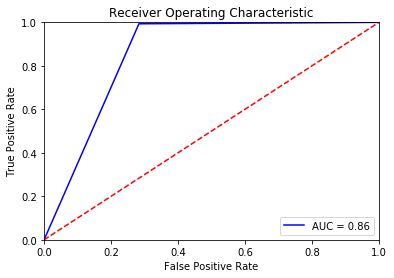

In [20]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**It’s no secret that the most important thing in solving a task is the ability to properly choose or even create features. It’s called Feature Selection and Feature Engineering. While Feature Engineering is quite a creative process and relies more on intuition and expert knowledge, there are plenty of ready-made algorithms for Feature Selection. Tree algorithms allow to compute the informativeness of features

In [21]:
#Applying Logistic regression to find important features. Higher the rank more important the attribute
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Ranking of features: ",fit.ranking_)

Num Features:  10
Selected Features:  [False  True False False False False  True  True False False False  True
 False False False False False False False False False False False False
 False False False False  True  True False False False  True False False
  True  True  True False False]
Ranking of features:  [ 8  1 11  4 28 29  1  1 30  6 26  1  7 24 27 12 20 23 17 31 32  9 13 16  3
  2 14 19  1  1  5 25 22  1 21 15  1  1  1 18 10]


In [22]:
#Applying Decision tree to find important features. Higher the score more the important the attribute
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[  4.45096845e-05   6.65071195e-03   7.63022333e-02   6.92543335e-02
   4.34858476e-03   1.10541497e-03   2.31886488e-05   5.49848741e-03
   0.00000000e+00   4.16734236e-03   0.00000000e+00   3.31111185e-01
   1.11409209e-02   0.00000000e+00   0.00000000e+00   5.69153761e-08
   0.00000000e+00   0.00000000e+00   2.53391790e-05   0.00000000e+00
   0.00000000e+00   2.60382561e-04   2.45005830e-02   1.38793861e-01
   4.16669606e-02   3.08617500e-02   1.08074291e-02   7.83166766e-03
   6.51417786e-02   9.43260520e-03   1.89680836e-02   5.99569437e-03
   1.90344860e-02   5.76823572e-02   6.39027531e-04   4.92669242e-02
   4.80413065e-04   1.46361825e-03   3.32003999e-03   1.02675336e-03
   3.15327571e-03]


In [23]:
#Dropping all the other unselecteced attributes from dataset
datapre.drop('duration', axis = 1, inplace = True)
print("Dropping duration")
datapre.drop('flag', axis = 1, inplace = True)
print("Dropping flag")
datapre.drop('dst_bytes', axis = 1, inplace = True)
print("Dropping dst_bytes")
datapre.drop('land', axis = 1, inplace = True)
print("Dropping land")
datapre.drop('wrong_fragment', axis = 1, inplace = True)
print("Dropping wrong_fragment")
datapre.drop('urgent', axis = 1, inplace = True)
print("Dropping urgent")
datapre.drop('hot', axis = 1, inplace = True)
print("Dropping hot")
datapre.drop('num_failed_logins', axis = 1, inplace = True)
print("Dropping num_failed_logins")
datapre.drop('logged_in', axis = 1, inplace = True)
print("Dropping logged_in")
datapre.drop('lnum_compromised', axis = 1, inplace = True)
print("Dropping lnum_compromised")
datapre.drop('lroot_shell', axis = 1, inplace = True)
print("Dropping lroot_shell")
datapre.drop('lsu_attempted', axis = 1, inplace = True)
print("Dropping lsu_attempted")
datapre.drop('lnum_root', axis = 1, inplace = True)
print("Dropping lnum_root")
datapre.drop('lnum_file_creations', axis = 1, inplace = True)
print("Dropping lnum_file_creations")
datapre.drop('lnum_shells', axis = 1, inplace = True)
print("Dropping lnum_shells")
datapre.drop('lnum_access_files', axis = 1, inplace = True)
print("Dropping lnum_access_files")
datapre.drop('lnum_outbound_cmds', axis = 1, inplace = True)
print("Dropping lnum_outbound_cmds")
datapre.drop('is_host_login', axis = 1, inplace = True)
print("Dropping is_host_login")
datapre.drop('is_guest_login', axis = 1, inplace = True)
print("Dropping is_guest_login")
datapre.drop('srv_count', axis = 1, inplace = True)
print("Dropping srv_count")
datapre.drop('serror_rate', axis = 1, inplace = True)
print("Dropping serror_rate")
datapre.drop('srv_serror_rate', axis = 1, inplace = True)
print("Dropping srv_serror_rate")
datapre.drop('rerror_rate', axis = 1, inplace = True)
print("Dropping rerror_rate")
datapre.drop('srv_rerror_rate', axis = 1, inplace = True)
print("Dropping srv_rerror_rate")
datapre.drop('diff_srv_rate', axis = 1, inplace = True)
print("Dropping diff_srv_rate")
datapre.drop('srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping srv_diff_host_rate")
datapre.drop('dst_host_count', axis = 1, inplace = True)
print("dst_host_count")
datapre.drop('dst_host_srv_count', axis = 1, inplace = True)
print("Dropping dst_host_srv_count")
datapre.drop('dst_host_diff_srv_rate', axis = 1, inplace = True)
print("Dropping dst_host_diff_srv_rate")
datapre.drop('dst_host_srv_diff_host_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_diff_host_rate")
datapre.drop('dst_host_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_serror_rate")
datapre.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_serror_rate")
datapre.drop('dst_host_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_rerror_rate")
datapre.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
print("Dropping dst_host_srv_rerror_rate")

Dropping duration
Dropping flag
Dropping dst_bytes
Dropping land
Dropping wrong_fragment
Dropping urgent
Dropping hot
Dropping num_failed_logins
Dropping logged_in
Dropping lnum_compromised
Dropping lroot_shell
Dropping lsu_attempted
Dropping lnum_root
Dropping lnum_file_creations
Dropping lnum_shells
Dropping lnum_access_files
Dropping lnum_outbound_cmds
Dropping is_host_login
Dropping is_guest_login
Dropping srv_count
Dropping serror_rate
Dropping srv_serror_rate
Dropping rerror_rate
Dropping srv_rerror_rate
Dropping diff_srv_rate
Dropping srv_diff_host_rate
dst_host_count
Dropping dst_host_srv_count
Dropping dst_host_diff_srv_rate
Dropping dst_host_srv_diff_host_rate
Dropping dst_host_serror_rate
Dropping dst_host_srv_serror_rate
Dropping dst_host_rerror_rate
Dropping dst_host_srv_rerror_rate


**FEATURE DESCRIPTION - Selected features for DOS attack detection
protocol_type -type of the protocol, e.g. tcp, udp, etc. discrete
service - network service on the destination, e.g., http, telnet, etc.
src_bytes - Bytes sent from source to destination
count - number of connections to the same host as the current connection in the past two seconds
same_srv_rate - of connections to the same service
dst_host_same_srv_rate - % of connections having the same destination host and using the same service
dst_host_same_src_port_rate - % of connections to the current host having the same src port

In [24]:
#Writing the extracted data into new file
datapre.to_csv("D:/DMKDD/KDDCup99DOSONLY.csv",encoding='utf-8', index=False)
datapre.head()

,protocol_type,service,src_bytes,count,same_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate,label
0,1,33,181,8,1.0,1.0,0.11,0
1,1,33,239,8,1.0,1.0,0.05,0
2,1,33,235,8,1.0,1.0,0.03,0
3,1,33,219,6,1.0,1.0,0.03,0
4,1,33,217,6,1.0,1.0,0.02,0


**Once the dataset is preprocessed to contain only the required attributes to classify DOS attacks, we perform cross validation once again and train the different classifier models and check their accuracy.

In [25]:
#Sampling 25% of the data with replacement
from sklearn.cross_validation import train_test_split
# Generate the sampleset from training set.  Set random_state to be able to replicate results.
sampleset1 = datapre.sample(frac=0.5, random_state=1)
sampleset = sampleset1.sample(frac=0.5, random_state=1)
# Print the shape of sample set.
sampleset['label'].value_counts()

1    97754
0    24430
Name: label, dtype: int64

In [26]:
#We will work with this dataset with the x feature-object matrix and values of the y target variable.
array=sampleset.values
x=array[:,0:7]
y=array[:,7]

In [27]:
#Cross validation
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## Spliting of training dataset into 70% training data and 30% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
#Array for storing classifier Models and their respective scores
models=[]
scores=[]

**The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method.

------------------------------------------
Accuracy =  98.4722828459  %
[[ 7028   204]
 [  356 29068]]
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      7232
        1.0       0.99      0.99      0.99     29424

avg / total       0.98      0.98      0.98     36656



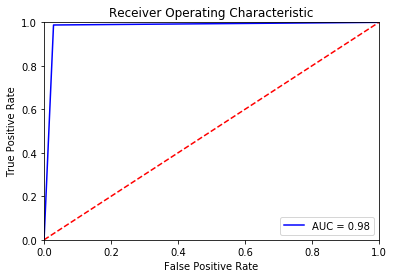

In [29]:
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
clf = GaussianNB()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Naive Bayes Classifier")
scores.append(acc*100)

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. This method requires less data preparation. The cost of using the tree is logarithmic in the number of data points used to train the tree.

------------------------------------------
Accuracy =  99.9754474029  %
[[ 7228     4]
 [    5 29419]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



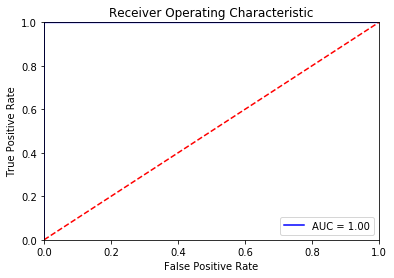

In [30]:
#Decision Tree Classisfier 
from sklearn import tree
clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth = 20)
 
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)
report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Decision tree Classifier")
scores.append(acc*100)

**Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object. It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

------------------------------------------
Accuracy =  99.9781754692  %
[[ 7230     2]
 [    6 29418]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



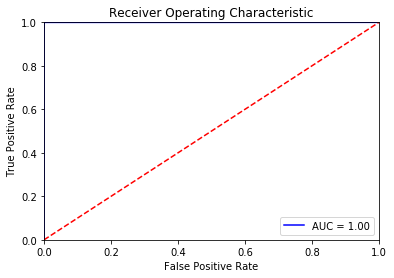

In [31]:
#Random Forest Classifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("Random Forest Classifier")
scores.append(acc*100)

**k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. Both for classification and regression, a useful technique can be to assign weight to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones. 

------------------------------------------
Accuracy =  99.9727193365  %
[[ 7229     3]
 [    7 29417]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      7232
        1.0       1.00      1.00      1.00     29424

avg / total       1.00      1.00      1.00     36656



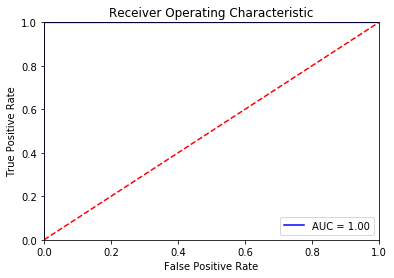

In [32]:
#K-Nearest Neighbour Classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
acc=accuracy_score(prediction, labels_test)
print("------------------------------------------")
print("Accuracy = ",acc*100," %")
matrix = confusion_matrix(labels_test, prediction)
print(matrix)

report = classification_report(labels_test, prediction)
print(report)


from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(labels_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

models.append("K-Nearest neighbour Classifier")
scores.append(acc*100)

In [33]:
#Making a dataframe that consists of models and their respective scores
dat = pd.DataFrame(index=[1,2,3,4])
dat["Model"] = models
dat["Score"] = scores
dat.set_index("Model")

,Score
Model,
Naive Bayes Classifier,98.472283
Decision tree Classifier,99.975447
Random Forest Classifier,99.978175
K-Nearest neighbour Classifier,99.972719


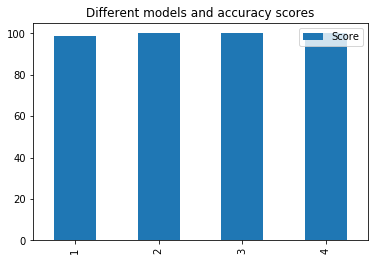

In [34]:
#Comparing the accuracy of different models
dat.plot(kind = "bar",title="Different models and accuracy scores")

**In Keras, a model is created using Sequential. You may wanna recall that Neural Networks holds large number of neurons residing inside several sequential layers. We will use the above neural network architecture to build our first deep learning model. The input data which is of size 8, is sent to the first hidden layer that has 7 neurons (we have selected 7 attributes). This is a very useful approach, if we don’t have any clue about the no.of.neurons to specify at the very first attempt. From here, we can easily perform trial-and-error procedure to increase the network architecture to produce higher accuracy. The next hidden layer has 4 neurons and the final output layer has 1 neuron that tells whether it is an attack or not. These parameters are to be tuned according to the problem as our model needs some optimization in the background (which is taken care by TensorFlow) so that it learns from the data during each epoch. If you are not familiar with the term epoch, it is the number of iterations involved during the training process of a neural network. 

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# seed for reproducing same results
seed = 9
np.random.seed(seed)
# split the data into training (67%) and testing (33%)
(X_train, X_test, Y_train, Y_test) = train_test_split(x, y, test_size=0.35, random_state=seed)
# create the model
model = Sequential()
model.add(Dense(7, input_dim=7, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=50, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Using TensorFlow backend.
D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  
D:\Software\Pythoon3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
D:\Software\Pythoon3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


42368/42765 [============================>.] - ETA: 0sAccuracy: 99.39%
